In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
print(os.getcwd())


c:\Users\Lenovo\Desktop\CAT VS DOG


In [5]:
os.listdir()


['labels.csv', 'labels_test.csv', 'p1.ipynb']

In [6]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [7]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

#Data Augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)


In [9]:
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


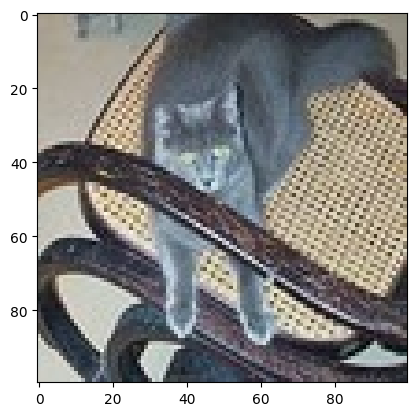

In [10]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [11]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics =['accuracy'])

In [15]:
model.fit(datagen.flow(X_train,Y_train,batch_size=32),
epochs = 30,
validation_data=(X_test,Y_test),
verbose=1)

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4855 - loss: 0.7198 - val_accuracy: 0.4800 - val_loss: 0.6931
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.5070 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.5000 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5350 - val_loss: 0.6922
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 872ms/step - accuracy: 0.5160 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 882ms/step - accuracy: 0.5135 - loss: 0.6917 - val_accuracy: 0.5325 - val_loss: 0.6884
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 872ms/step - accuracy: 0.5420 - loss: 0.6885 - val_accuracy: 0.6175 - val_loss: 0.6826
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 875ms/step - accuracy: 0.5565 - loss: 0.6837 - val_accuracy: 0.607

In [16]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.6925 - loss: 0.5623


[0.5623252391815186, 0.6924999952316284]

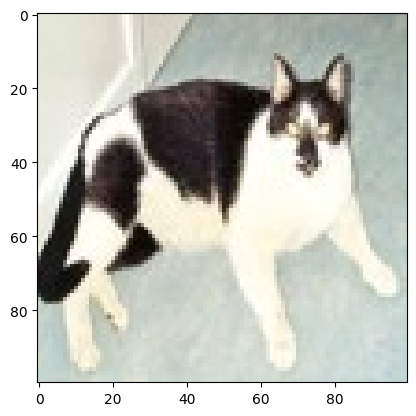

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
Our model says it is a :  dog


In [17]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = "dog"
else:
    pred = "cat"

print("Our model says it is a : ",pred)

In [18]:
model.save('model.h5')
print('Saved model to  model.h5')

Saved model to  model.h5
